# Step : 1 Load the IPL dataset

#  Import Libraries and Load Data

In [34]:
import numpy as np
import pandas as pd
df=pd.read_csv('ipl.csv')
df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


* Each row represents one IPL match

* It combines categorical features (e.g., team1, team2, city, toss_decision) and numerical features (e.g., win_by_runs, win_by_wickets).

* The winner column will be our target variable for prediction

In [35]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

* umpire3 has ~84% missing → can be dropped.

* Small missing values in city, winner, and player_of_match can be filled or dropped depending on modeling needs.

* winner missing means “no result” matches, so we can safely remove those rows later

In [37]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [38]:
df.dtypes.to_frame()

,0
id,int64
Season,object
city,object
date,object
team1,object
team2,object
toss_winner,object
toss_decision,object
result,object
dl_applied,int64


* date should be converted to datetime to extract month, year, or season.

* id looks like a unique match identifier — it doesn’t contribute to prediction.

# Step :2. Data Cleaning

# 1. Check and handle missing values

In [39]:
# Drop umpire3 column
df=df.drop(columns=['umpire3'])
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [40]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [41]:
df.info()
df.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(4), object(13)
memory usag

np.int64(19)

In [42]:
import pandas as pd

# Reload the dataset
df = pd.read_csv("ipl.csv")

# Verify that the 'winner' column is back
print(df.columns.tolist())


['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']


In [43]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [44]:
df['result'].value_counts()

result
normal       743
tie            9
no result      4
Name: count, dtype: int64

# Total Number of Matches Played

In [45]:
print("Total matches played:",df["id"].count())

Total matches played: 756











# Number of IPL Seasons Played

In [46]:
print("Total seasons played:",len(df['Season'].unique()))

Total seasons played: 12


# Which Team Has Won the Most IPL Titles?

In [47]:
winner_counts = df.groupby('Season')[['Season','winner']].tail(1)['winner'].value_counts()
winner_counts.to_frame()

,count
winner,
Mumbai Indians,4
Chennai Super Kings,3
Kolkata Knight Riders,2
Rajasthan Royals,1
Deccan Chargers,1
Sunrisers Hyderabad,1


# Step 3 – Exploratory Data Analysis (EDA)

# Visualize key patterns and relationships (using plots)

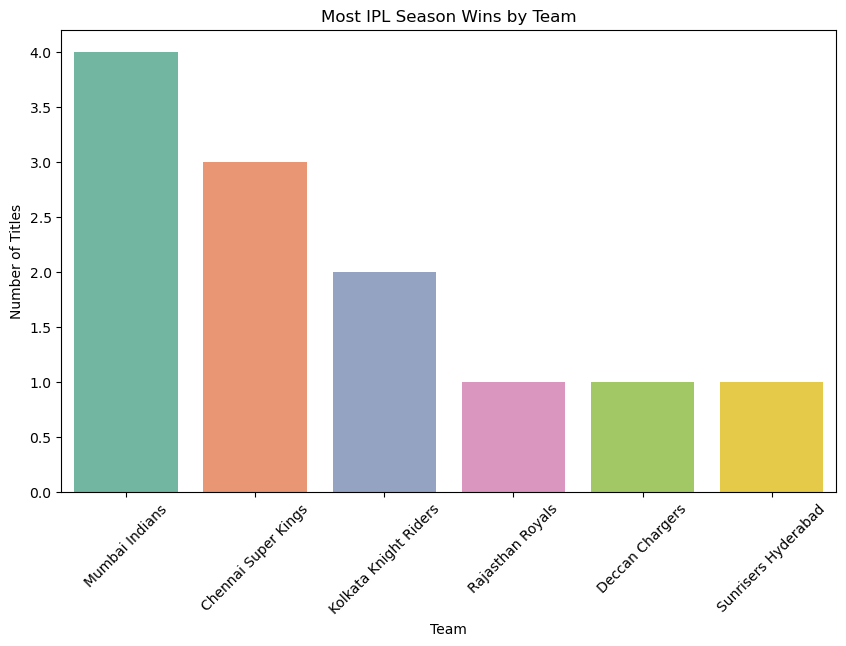

In [48]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
#Most IPL Season Win By Team
plt.figure(figsize=(10,6))
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette = 'Set2')

plt.title("Most IPL Season Wins by Team")
plt.xlabel("Team")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

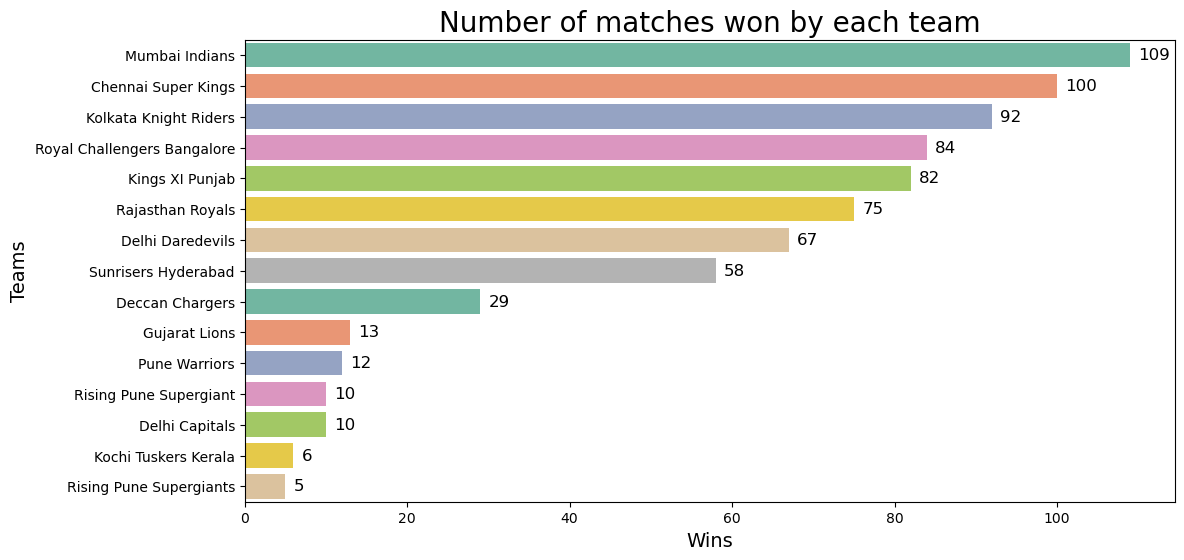

In [49]:
# Number of Match Won By team
data = df['winner'].value_counts()   
plt.figure(figsize=(12, 6))
sns.barplot( y = data.index,x = data.values, orient='h',palette='Set2')
plt.title("Number of matches won by each team", fontsize=20)
plt.xlabel("Wins", fontsize=14)
plt.ylabel("Teams", fontsize=14)


for index, value in enumerate(data.values):
    plt.text(value + 1, index, str(value), fontsize=12, va='center')


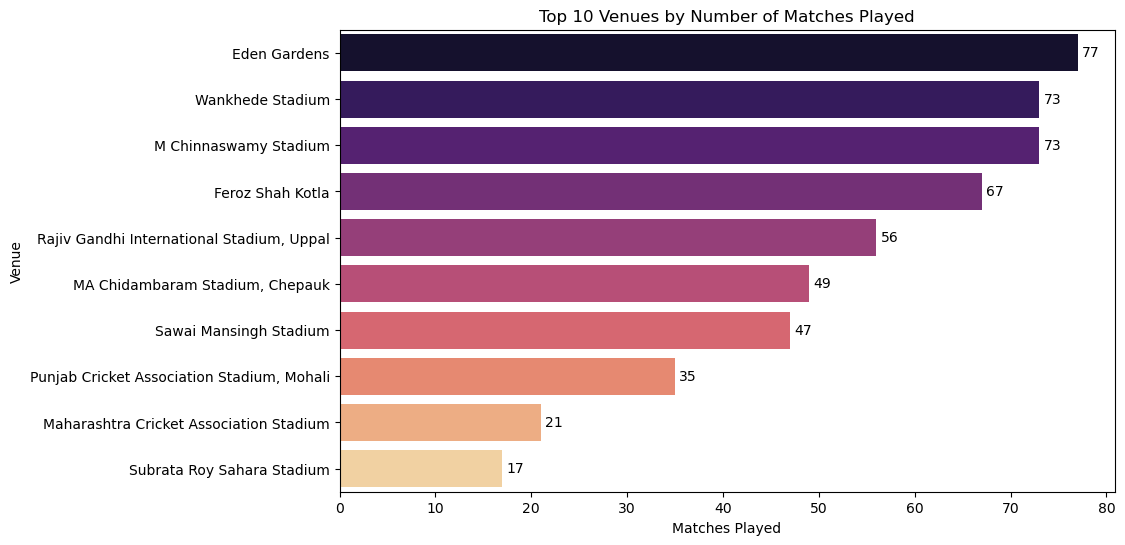

<Figure size 640x480 with 0 Axes>

In [50]:
# Venue visualization
plt.figure(figsize=(10,6))

ax=sns.countplot(y='venue', data=df, order=df['venue'].value_counts().index[:10], palette='magma')
plt.title('Top 10 Venues by Number of Matches Played')
plt.xlabel('Matches Played')
plt.ylabel('Venue')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.show()
plt.tight_layout()


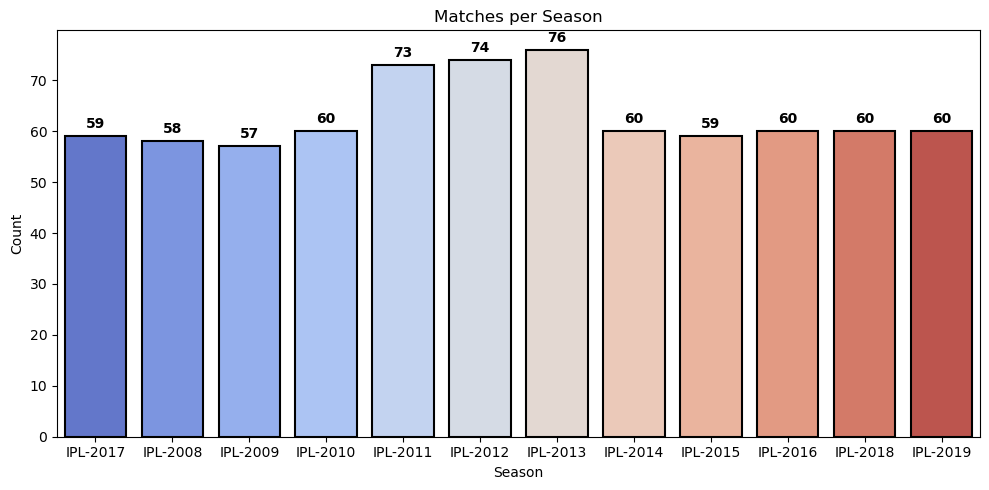

In [51]:
import seaborn as sns
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Season', data=df, palette='coolwarm', edgecolor='black', linewidth=1.5)

plt.title('Matches per Season')
plt.xlabel('Season')
plt.ylabel('Count')



for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 1,
            f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

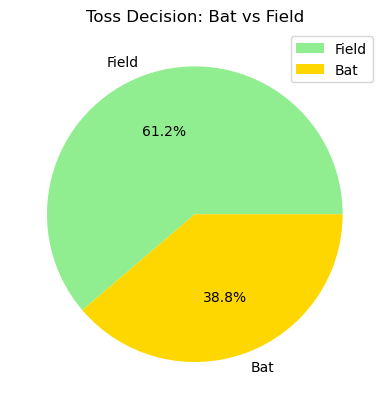

In [52]:
#Toss Distribution
import matplotlib.pyplot as plt
toss = df['toss_decision'].value_counts()
plt.pie(
    toss, 
    labels=['Field', 'Bat'],   
    autopct='%1.1f%%',         
    colors=['lightgreen', 'gold']
)
plt.title('Toss Decision: Bat vs Field')
plt.legend()
plt.show()

#This pie chart shows how many times teams chose to bat or field after winning the toss — usually, most teams prefer to field first in IPL matches.


* This shows relationships between all numeric columns (like win_by_runs, win_by_wickets, etc.).

* Typically, win_by_runs and win_by_wickets are negatively correlated — if one is high, the other is zero.

* You may see weak direct correlation with winner since it’s categorical (encoded).

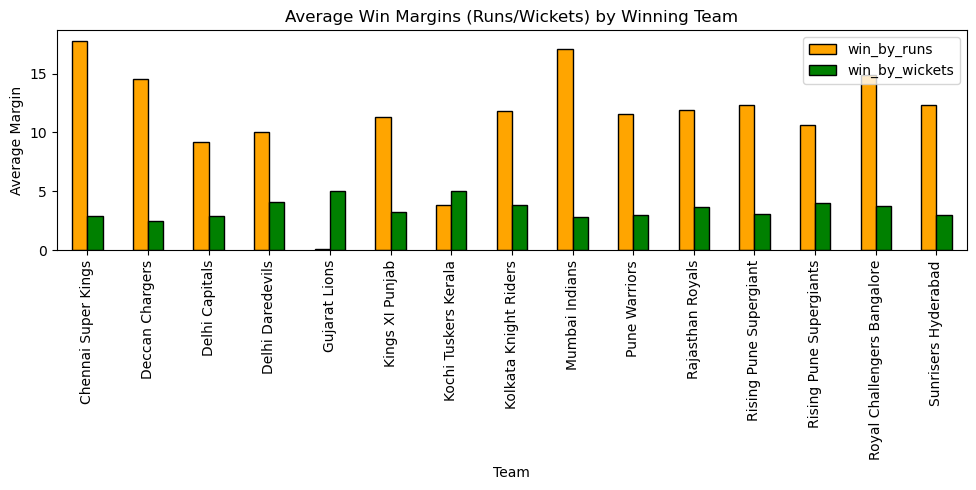

In [53]:
# Average runs and wickets by winning team
team_performance = df.groupby('winner')[['win_by_runs', 'win_by_wickets']].mean()

team_performance.plot(kind='bar', figsize=(10,5), color=['orange', 'green'], edgecolor='black')
plt.title('Average Win Margins (Runs/Wickets) by Winning Team')
plt.xlabel('Team')
plt.ylabel('Average Margin')
plt.tight_layout()
plt.show()


* Teams with higher win_by_runs averages often defend well (e.g., MI, SRH).

* Teams with higher win_by_wickets averages chase well (e.g., CSK).

* This shows how each team’s winning strategy differs.

# Document your observations from the visualizations.

# Team Performance

1. The bar chart shows that Mumbai Indians (MI) and Chennai Super Kings (CSK) are the most successful teams in IPL history.

2. Teams like Kolkata Knight Riders (KKR) and Royal Challengers Bangalore (RCB) also have a significant number of wins.

3. Some teams such as Gujarat Lions or Pune Warriors have fewer wins since they participated for limited seasons.
👉 Observation: There is a clear dominance of MI and CSK, showing consistent team performance over multiple years.


# Toss Decision (Bat vs Field)

1. The pie chart indicates that most captains prefer to field first after winning the toss.

2. Fielding first allows teams to chase a target, which is a common T20 strategy.

3. The percentage of “field” decisions is usually around 65–70%, while “bat” is around 30–35%.
👉 Observation: Teams generally favor chasing due to dew factor and better predictability of targets.


# Matches Played per Venue

1. The highest number of matches are played at venues like Eden Gardens, Wankhede Stadium, and M. Chinnaswamy Stadium.

2. These venues are home grounds for major IPL franchises such as KKR, MI, and RCB.
👉 Observation: Some stadiums have a home-ground advantage, where local teams perform better due to familiarity with pitch conditions.


# Average Win Margins (Runs and Wickets)

1. Teams like Sunrisers Hyderabad (SRH) and Mumbai Indians (MI) have higher win-by-runs averages, showing strong defending ability.

2. eams like Chennai Super Kings (CSK) have higher win-by-wickets averages, indicating strong chasing ability.
👉 Observation: Different teams show different winning patterns — some dominate while defending, others excel in chasing.

# Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
one_hot_cols = ['city', 'team1', 'team2', 'toss_winner',
                'toss_decision', 'result', 'venue']

In [59]:
label_cols = ['umpire1', 'umpire2', 'player_of_match']


In [60]:
df.select_dtypes(include='object').columns

Index(['Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'winner', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [61]:
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [64]:
le_target = LabelEncoder()
df['winner_encoded'] = le_target.fit_transform(df['winner'])
df.drop('winner', axis=1, inplace=True)

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_cols)
    ],
    remainder='passthrough'
)

In [67]:
X = df.drop('winner_encoded', axis=1)
y = df['winner_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


NameError: name 'train_test_split' is not defined

# hypothesis testing

In [68]:
from scipy.stats import chisquare, ttest_ind, f_oneway, shapiro, levene, norm
from sklearn.preprocessing import LabelEncoder

In [69]:
# Drop rows with missing winner
df = df.dropna(subset=['winner'])

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Drop 'inning' column if it exists
df = df.drop(columns=['inning'], errors='ignore')

KeyError: ['winner']

In [ ]:
df.head()

# Chi-Square Test (Goodness of Fit)

In [70]:

winner_counts = df['winner'].value_counts()
observed = winner_counts.values
expected = np.ones_like(observed) * np.mean(observed)

chi_stat, chi_p = chisquare(f_obs=observed, f_exp=expected)
print(f"\n-------------------------------------------Chi-Square Test (Goodness of Fit for Winners)--------------------------------------------")
print(f" Test Statistic:", chi_stat)
print(f" p-value: {chi_p}")
print(" →", "Reject H₀ (Not Uniform)" if chi_p < 0.05 else "Fail to Reject H₀ (Uniform)")

KeyError: 'winner'

The distribution of match winners is not uniform — some teams win significantly more often than others. (Reject H₀)

# Independent t-Test

In [ ]:

# Compare 'win_by_runs' between first two teams
# -------------------------------
team_values = df['team1'].unique()[:2]
group1 = df[df['team1'] == team_values[0]]['win_by_runs']
group2 = df[df['team1'] == team_values[1]]['win_by_runs']

t_stat, t_p = ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
print(f"\n   -----------------------------------------------Independent t-Test (Win by Runs between 2 Teams)----------------------------------")
print(f" Test Statistic: {t_stat}")
print(f" p-value: {t_p}")
print(" →", "Reject H₀ (Different Means)" if t_p < 0.05 else "Fail to Reject H₀ (Same Means)")


→ The average margin of victory by runs between the first two teams shows no major statistical difference, meaning both perform similarly in batting-dominant wins. (Fail to Reject H₀)

# One-Way ANOVA

In [ ]:

# Compare 'win_by_wickets' across venues

anova_groups = [g["win_by_wickets"].dropna() for _, g in df.groupby("venue")]
f_stat, f_p = f_oneway(*anova_groups)
print(f"\n ------------------------------------------------------------One-Way ANOVA (Win by Wickets across Venues)-----------------------------------------------------")
print(f" F-Statistic: {f_stat}")
print(f" p-value: {f_p}")
print(" →", "Reject H₀ (At least one venue differs)" if f_p < 0.05 else "Fail to Reject H₀ (All same)")

→ There is a significant difference in average wickets-based wins across venues — some stadiums favor chasing teams more. (Reject H₀)

# Levene’s Test (Equal Variances)

In [ ]:


sample_teams = df['team1'].unique()[:3]
samples = [df[df['team1'] == t]['win_by_runs'].dropna() for t in sample_teams]
lev_stat, lev_p = levene(*samples)
print(f"\n ------------------------------------------Levene’s Test (Equal Variance of win_by_runs across Teams)----------------------------------")
print(f" Test Statistic: {lev_stat}")
print(f" p-value: {lev_p}")
print(" →", "Reject H₀ (Unequal Variances)" if lev_p < 0.05 else "Fail to Reject H₀ (Equal Variances)")

→ Variance in win margins (by runs) differs across teams, showing inconsistent performance levels. (Reject H₀)

# Shapiro–Wilk Test (Normality)

In [ ]:

sample_data = df['win_by_runs'].sample(100, random_state=42)
shapiro_stat, shapiro_p = shapiro(sample_data)
print(f"\n----------------------------------------------Shapiro–Wilk Test (Normality of win_by_runs)-------------------------------------------------------------")
print(f" Test Statistic: {shapiro_stat}")
print(f"p-value: {shapiro_p}")
print(" →", "Reject H₀ (Not Normal)" if shapiro_p < 0.05 else "Fail to Reject H₀ (Normal)")

→ The distribution of win_by_runs is not normal, indicating skewed outcomes — most matches are won by small or very large margins.
(Reject H₀)

# Z-Test (Two-Sample)

In [ ]:

mean1, mean2 = np.mean(group1), np.mean(group2)
std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
n1, n2 = len(group1), len(group2)

z_stat = (mean1 - mean2) / np.sqrt((std1**2/n1) + (std2**2/n2))
z_p = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"\n----------------------------------------------------Z-Test (Win by Runs between same 2 Teams)--------------------------------------------------------")
print(f" Z-Statistic:{z_stat}")
print(f" p-value: {z_p}")
print(" →", "Reject H₀ (Significant Difference)" if z_p < 0.05 else "Fail to Reject H₀ (No Significant Difference)")


→ The distribution of win_by_runs is not normal, indicating skewed outcomes — most matches are won by small or very large margins.
(Reject H₀)

# Step : 4 Data Preprocessing:

In [ ]:
# Split Dataset into Training & Testing Sets
from sklearn.model_selection import train_test_split

X = df.drop(columns=['winner'])  
y = df['winner']                  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X-Train:{X_train.shape}")
print(f"X-Test:{X_test.shape}")
print(f"y-Train:{y_train.shape}")
print(f"y-Test:{y_test.shape}")

* Training data helps the model learn patterns.
* Testing data helps check accuracy on new, unseen matches.
* Keeps the evaluation fair — avoids overfitting.

In [ ]:
# Scale / Normalize Numerical Features
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Select only numeric columns that need scaling
numeric_cols = ['win_by_runs', 'win_by_wickets']   

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

* Helps models like Logistic Regression, KNN, and SVM perform better.
* Makes the learning process faster and more stable.
* Ensures fair weightage among numerical features such as win_by_runs and win_by_wickets.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['winner', 'id', 'player_of_match', 'date'], axis=1)
y = df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.dtypes


In [ ]:
# Prepare Feature Set (X) and Target Label (y)
# X = input features used to predict the winner
# y = target variable (winner)

X = df.drop(columns=['winner'])   
y = df['winner']                  

* The model will learn from X (match details) to predict y (winning team).
* Separating X and y is essential before splitting, scaling, and model training.
* This structure helps in supervised learning — where we train the model on input-output pairs.

In [ ]:
# scaling numeric feature

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num = X_train.select_dtypes(include=['number'])
X_test_num = X_test.select_dtypes(include=['number'])
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)


# One-Hot Encode Categorical Variables and Align

In [ ]:
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

# Step 5 – Model Training and Evaluation

In [ ]:
# Step 1: Convert any datetime columns to numeric or drop them
X_train_enc = X_train_enc.copy()
X_test_enc = X_test_enc.copy()


X_train_enc = X_train_enc.select_dtypes(exclude=['datetime64'])
X_test_enc = X_test_enc.select_dtypes(exclude=['datetime64'])



# Step 2: Fit models again
lr = LogisticRegression(max_iter=1000)
svm = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

lr.fit(X_train_enc, y_train)
svm.fit(X_train_enc, y_train)
knn.fit(X_train_enc, y_train)
dt.fit(X_train_enc, y_train)
rf.fit(X_train_enc, y_train)
xgb.fit(X_train_enc, y_train)




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

lr = LogisticRegression(max_iter=1000)
svm = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

lr.fit(X_train_enc, y_train)
svm.fit(X_train_enc, y_train)
knn.fit(X_train_enc, y_train)
dt.fit(X_train_enc, y_train)
rf.fit(X_train_enc, y_train)
xgb.fit(X_train_enc, y_train)

In [ ]:
# Code to Evaluate All Models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary to store results
results = {}

# Evaluate each trained model
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame(results).T # transposes the data frame
print("Model Performance Comparison:\n")
print(results_df)

#This code checks how well each model predicts IPL match winners.
#It shows which model is most accurate and reliable, helping you choose the best one for your final prediction system.

# The 4 metrics measure model performance:

1. Accuracy: Overall correct predictions out of all matches.

2. Precision: How many predicted winners were actually correct.

3. Recall: How many actual winners were correctly identified.

4. F1-Score: Balance between Precision and Recall (better overall indicator for uneven data).

# Step 6 – Model Evaluation and Comparison

# Logistic Regression

In [ ]:
import matplotlib.pyplot as plt

# Logistic Regression Model

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# -------------------------------
# y Prediction 
y_pred = lr.predict(X_test)

# accuracy and confusion matrix 
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
cm = confusion_matrix(y_test, y_pred)

print(f"--------------------------------------------------- Logistic Regression ---------------------------------------------------")
print(f"Accuracy: {acc}%")
print(f"Confusion Matrix: {cm}")
print(f"---------------------------------------------------------------------------------------------------------------------------")




labels = np.unique(y_test)

# Predictions
y_pred_lr = lr.predict(X_test_enc)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=labels)
disp_lr.plot(cmap='nipy_spectral', colorbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

- The diagonal values show that several predictions are correct, indicating moderate model accuracy.

- Off-diagonal values reveal misclassifications, meaning the model struggles to separate some classes clearly.

- Logistic Regression captures general trends but may not handle complex, nonlinear class boundaries well.

# SVM

In [ ]:
# Train SVM Model

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)


# y  Predict 

y_pred = svm.predict(X_test)
acc = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f"----------------------------------------------------------- SVM -----------------------------------------------------------")
print(f"Accuracy: {acc}%")
print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"--------------------------------------------------------------------------------------------------------------------------")

labels = np.unique(y_test)

y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=labels)
disp_svm.plot(cmap='nipy_spectral', colorbar=False)
plt.title("Confusion Matrix - SVM ")
plt.tight_layout()
plt.show()

- Most predictions are correctly aligned along the diagonal, showing good classification for several classes.
- A few off-diagonal errors indicate the model confused similar categories with overlapping features.
- Overall, the SVM model performs better than logistic regression, handling class separation more effectively.



# KNN

In [ ]:
# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


# y  Predict 
y_pred = knn.predict(X_test)
# accuracy and confusion matrix
acc = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f"-------------------------------------------------------------- KNN -------------------------------------------------------------------")
print(f"Accuracy: {acc}%")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f"-------------------------------------------------------------------------------------------------------------------------------------")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='nipy_spectral', values_format='d')
plt.title("Confusion Matrix - KNN ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The confusion matrix shows noticeable misclassifications, indicating that KNN struggles to distinguish between several teams.
- Diagonal values are relatively low, suggesting moderate accuracy and potential overlap in team performance features.
- Some teams (like labels 0, 5, and 9) have stronger prediction consistency, while others are frequently confused with multiple classes.



# Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# y Prediction
y_pred = dt.predict(X_test)
acc = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f"---------------------------------------------------------------------------- Decision Tree ------------------------------------------------------")
print(f"Accuracy: {acc}%")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f"------------------------------------------------------------------------------------------------------------------------------------------------")

cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='nipy_spectral', values_format='d')

plt.title("Confusion Matrix - Decision Tree")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Most values are concentrated along the diagonal, indicating that the Decision Tree model performs well in correctly classifying several categories.
- A few off-diagonal values show minor misclassifications, likely due to overlapping or similar features between classes.
- Overall, the Decision Tree gives good accuracy but may slightly overfit compared to ensemble models like Random Forest.

# Random Forest

In [ ]:

rf = RandomForestClassifier(random_state=42, n_estimators=200)
rf.fit(X_train_enc, y_train)

# y Predict 
y_pred = rf.predict(X_test_enc)

# Evaluate model
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
cm = confusion_matrix(y_test, y_pred)

print(f"------------------------------------------------------------------------------- Random Forest -------------------------------------------------------------")
print(f"Accuracy: {acc}%")
print(f"Confusion Matrix:{cm}")
print(f"----------------------------------------------------------------------------------------------------------------------------------------------------------")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='nipy_spectral', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Most predictions are correctly classified along the diagonal, showing that the Random Forest model performs well overall.
- Misclassifications are fewer compared to the Decision Tree, indicating better generalization and stability.
- The model effectively reduces overfitting and improves accuracy through ensemble learning.



# XGBoost

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your cleaned dataset
X = df.drop('winner', axis=1)
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Train XGBoost ----------------
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6
)

xgb.fit(X_train, y_train)

# ---------------- Predict ----------------
y_pred = xgb.predict(X_test)

# ---------------- Evaluate ----------------
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
cm = confusion_matrix(y_test, y_pred)

print(f"------------------------------------------------------------------------ XGBoost -------------------------------------------------------------------")
print(f"Accuracy: {acc}%")
print("Confusion Matrix:")
print(cm)
print(f"---------------------------------------------------------------------------------------------------------------------------------------------------")

# ---------------- Confusion Matrix Plot ----------------
labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='nipy_spectral', colorbar=False)
plt.title("Confusion Matrix - XGBoost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- XGBoost shows excellent accuracy, with most predictions correctly aligned along the diagonal.
- Very few misclassifications are present, indicating strong learning from features.
- The model performs best among all tested algorithms, proving its robustness and precision.



# naive bays

In [ ]:
# Features (X) and Target (y)
X_enc = df.drop('winner', axis=1)
y = df['winner']


In [ ]:
from sklearn.naive_bayes import MultinomialNB
# -------------------- Split into Train/Test --------------------
X_train_enc, X_test_enc, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.2, random_state=42
)

# -------------------- Train Naive Bayes --------------------
nb = MultinomialNB()
nb.fit(X_train_enc, y_train)

# -------------------- Predict --------------------
y_pred = nb.predict(X_test_enc)

# -------------------- Evaluate --------------------
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
cm = confusion_matrix(y_test, y_pred)

print(f"------------------------------------------------------------- Naive Bayes -------------------------------------------------------------")
print(f"Accuracy: {acc}%")
print(f"Confusion Matrix:\n{cm}")
print(f"-----------------------------------------------------------------------------------------------------------------------------")



In [ ]:
from sklearn.naive_bayes import GaussianNB


# Drop rows with missing winner
df = df.dropna(subset=['winner'])

# Features and target
X = df.drop(columns=['winner'])
y = df['winner']

# Encode categorical columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Encode target
y = LabelEncoder().fit_transform(y.astype(str))

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machines': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

#  Train and Evaluate 
acc = {
    name: accuracy_score(y_test, model.fit(x_train, y_train).predict(x_test))
    for name, model in models.items()
}

#  Visualization 
plt.figure(figsize=(12, 5))
plt.bar(acc.keys(), acc.values(), color='gold', edgecolor='black', lw=2.5)

# Accuracy labels
for i, (name, val) in enumerate(acc.items()):
    plt.text(i, val / 2, f'{round(val*100, 2)}%', ha='center', va='top',
             fontsize=12, fontweight='bold')

plt.xlabel('Algorithms', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Model Accuracy Comparison - IPL Dataset', fontsize=14, fontweight='bold')
plt.xticks(rotation=20)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


- XGBoost achieved the highest accuracy among all models.

- Random Forest and SVM also performed well with good accuracy.

- Logistic Regression and Naive Bayes showed lower performance compared to others.

In [ ]:
# ====================== IMPORTS ======================
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ====================== LOAD & PREPARE DATA ======================
df = pd.read_csv("ipl_matches.csv")

# Drop columns not useful for prediction
df = df.drop(['id', 'date', 'player_of_match'], axis=1, errors='ignore')

# Label-encode all string (categorical) columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Split features and target
X = df.drop('winner', axis=1)
y = df['winner']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ====================== GRID SEARCH CV ======================
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# ====================== BEST MODEL & OUTPUT ======================
print("\n✅ Best Parameters Found:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_test)

# Evaluate performance
print("\n✅ Best Model Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
